<a href="https://colab.research.google.com/github/jrebull/MIAAD_Mate/blob/main/MIAAD_Mate_Week_07_Compramos_el_Producto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import display

--- Tabla de Datos: Probabilidad de Compra vs. Salario ---


,Salario (miles),Probabilidad
0,6,0.0400
1,7,0.0400
2,8,0.0400
3,9,0.0400
4,10,0.0000
5,11,0.0399
6,12,0.0003
7,13,0.0391
8,14,0.0575
9,15,0.0533



--- Identificación de x_0 a partir de los datos ---
Observando la tabla, cuando el salario es de 20 miles, la probabilidad de compra es 0.5.
Por lo tanto, el valor del parámetro x_0 es: 20
Este valor representa el punto de inflexión de la curva logística.

--- Verificación mediante ajuste de curva ---
El valor de x_0 calculado por el ajuste es: 20.1505
El valor de k (tasa de crecimiento) ajustado es: 0.8993


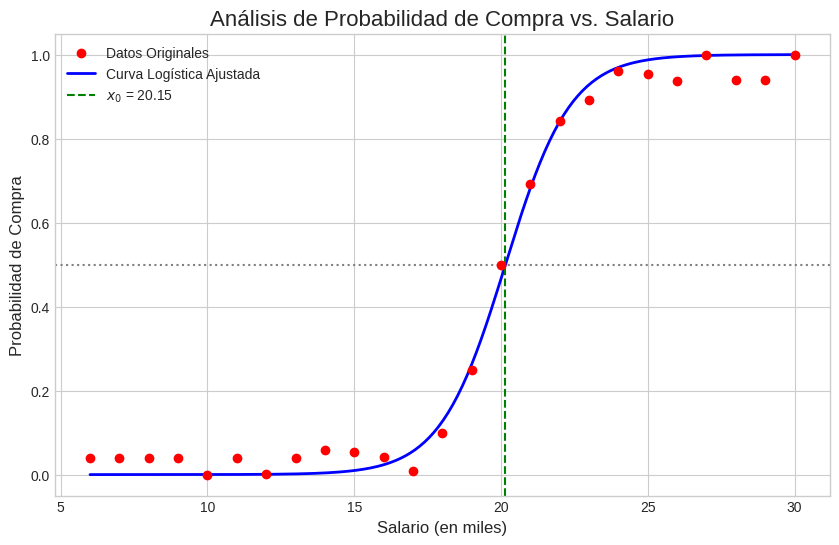

In [4]:
# ---------- 1. DATOS ORIGINALES ----------
# Se crea un DataFrame de pandas para almacenar y mostrar los datos.
data = {
    'Salario (miles)': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'Probabilidad': [0.0400, 0.0400, 0.0400, 0.0400, 0.0000, 0.0399, 0.0003, 0.0391, 0.0575, 0.0533, 0.0420, 0.0074, 0.0992, 0.2489, 0.5000, 0.6911, 0.8408, 0.8926, 0.9620, 0.9533, 0.9375, 0.9991, 0.9397, 0.9399, 1.0000]
}
df = pd.DataFrame(data)

# Se muestra la tabla original de datos
print("--- Tabla de Datos: Probabilidad de Compra vs. Salario ---")
# La función display() ofrece un formato de tabla más agradable en Colab
display(df)


# ---------- 2. IDENTIFICACIÓN DEL PARÁMETRO X_0 ----------

# Como se indica en el análisis, podemos identificar x_0 directamente de los datos,
# ya que la probabilidad es exactamente 0.5 cuando el salario es 20.
x0_observado = df[df['Probabilidad'] == 0.5]['Salario (miles)'].values[0]

print("\n--- Identificación de x_0 a partir de los datos ---")
print(f"Observando la tabla, cuando el salario es de {x0_observado} miles, la probabilidad de compra es 0.5.")
print(f"Por lo tanto, el valor del parámetro x_0 es: {x0_observado}")
print("Este valor representa el punto de inflexión de la curva logística.")

# ---------- 3. AJUSTE DE CURVA LOGÍSTICA (VERIFICACIÓN) ----------
# Para verificar esto computacionalmente, podemos ajustar una función logística a los datos.

# Definición de la función logística:
# f(x) = 1 / (1 + e^(-k*(x - x0)))
def funcion_logistica(x, k, x0):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Extraemos las variables 'x' y 'y' del DataFrame
x_data = df['Salario (miles)']
y_data = df['Probabilidad']

# Usamos 'curve_fit' para encontrar los mejores parámetros 'k' y 'x0'
initial_guess = [0.5, 20] # [k_inicial, x0_inicial]
params, covariance = curve_fit(funcion_logistica, x_data, y_data, p0=initial_guess)

# Extraemos los parámetros optimizados
k_ajustado, x0_ajustado = params

print("\n--- Verificación mediante ajuste de curva ---")
print(f"El valor de x_0 calculado por el ajuste es: {x0_ajustado:.4f}")
print(f"El valor de k (tasa de crecimiento) ajustado es: {k_ajustado:.4f}")


# ---------- 4. VISUALIZACIÓN DE RESULTADOS ----------
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos originales
ax.scatter(x_data, y_data, color='red', label='Datos Originales', zorder=5)

# Generar puntos para la curva ajustada
x_fit = np.linspace(df['Salario (miles)'].min(), df['Salario (miles)'].max(), 300)
y_fit = funcion_logistica(x_fit, k_ajustado, x0_ajustado)

# Graficar la curva logística ajustada
ax.plot(x_fit, y_fit, label='Curva Logística Ajustada', color='blue', linewidth=2)

# Resaltar el punto de inflexión x_0
ax.axvline(x=x0_ajustado, color='green', linestyle='--', label=f'$x_0$ = {x0_ajustado:.2f}')
ax.axhline(y=0.5, color='gray', linestyle=':')

# Añadir títulos y etiquetas
ax.set_title('Análisis de Probabilidad de Compra vs. Salario', fontsize=16)
ax.set_xlabel('Salario (en miles)', fontsize=12)
ax.set_ylabel('Probabilidad de Compra', fontsize=12)
ax.legend(loc='best')
ax.set_ylim(-0.05, 1.05)

# Mostrar la gráfica
plt.show()